# Carga y limpieza del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/ML/maildir'


MessageError: Error: credential propagation was unsuccessful

In [ ]:
!pip install tqdm


In [ ]:
import os
import re
from tqdm import tqdm
import pandas as pd


### 1. Carga de datos

In [ ]:
def leer_todos_los_archivos(base_path):
    archivos_encontrados = []

    for usuario in os.listdir(base_path):
        ruta_usuario = os.path.join(base_path, usuario)

        if os.path.isdir(ruta_usuario):
            for carpeta in os.listdir(ruta_usuario):
                ruta_carpeta = os.path.join(ruta_usuario, carpeta)

                if os.path.isdir(ruta_carpeta):
                    for archivo in os.listdir(ruta_carpeta):
                        ruta_archivo = os.path.join(ruta_carpeta, archivo)
                        if os.path.isfile(ruta_archivo):
                            archivos_encontrados.append({
                                "user": usuario,
                                "folder": carpeta,
                                "filename": archivo,
                                "path": ruta_archivo
                            })

    return archivos_encontrados

# Ejecutar y mostrar resultados
todos_los_archivos = leer_todos_los_archivos(base_path)
print(f"Total de correos encontrados: {len(todos_los_archivos)}")
print("Ejemplos:")
for a in todos_los_archivos[:5]:
    print(a)


Total de correos encontrados: 30605
Ejemplos:
{'user': 'dasovich-j', 'folder': 'ab_1890_group', 'filename': '4', 'path': '/content/drive/MyDrive/ML/maildir/dasovich-j/ab_1890_group/4'}
{'user': 'dasovich-j', 'folder': 'ab_1890_group', 'filename': '1', 'path': '/content/drive/MyDrive/ML/maildir/dasovich-j/ab_1890_group/1'}
{'user': 'dasovich-j', 'folder': 'ab_1890_group', 'filename': '10', 'path': '/content/drive/MyDrive/ML/maildir/dasovich-j/ab_1890_group/10'}
{'user': 'dasovich-j', 'folder': 'ab_1890_group', 'filename': '11', 'path': '/content/drive/MyDrive/ML/maildir/dasovich-j/ab_1890_group/11'}
{'user': 'dasovich-j', 'folder': 'ab_1890_group', 'filename': '7', 'path': '/content/drive/MyDrive/ML/maildir/dasovich-j/ab_1890_group/7'}


### 2. Parsing de cada email
Separar campos clave  para el análisis: From, To, Date, Subject, Body, Message-ID, etc.
Esto se hace para cada archivo y se almacena en una lista o DataFrame.

In [ ]:
# Función para parsear campos comunes de texto plano
def parsear_email(texto):
    campos = {
        "from": None,
        "to": None,
        "cc": None,
        "date": None,
        "subject": None,
        "body": None
    }

    cabeceras = ['From:', 'To:', 'Cc:', 'Date:', 'Subject:']
    for campo in cabeceras:
        match = re.search(f"{campo} (.+)", texto)
        if match:
            campos[campo[:-1].lower()] = match.group(1).strip()

    body_split = texto.split('\n\n', 1)
    campos["body"] = body_split[1].strip() if len(body_split) > 1 else ''
    return campos


In [ ]:
correos_parseados = []

# Ajustar el número de archivos aquí (1000 para pruebas rápidas)
limite = 1000
subset = todos_los_archivos#[:limite]

for item in tqdm(subset):
    try:
        with open(item["path"], "r", encoding="latin1") as f:
            raw_text = f.read()
            datos = parsear_email(raw_text)
            datos.update(item)  # Agrega info del archivo
            correos_parseados.append(datos)
    except:
        continue


 60%|██████    | 18482/30605 [1:30:00<57:07,  3.54it/s]  

In [ ]:
# Guardar resultado en CSV para futuras cargas rápidas
df = pd.DataFrame(correos_parseados)
ruta_salida = '/content/drive/MyDrive/ML/correos_parseados.csv'
df.to_csv(ruta_salida, index=False)
print(f"Guardado en: {ruta_salida}")


### 3. Limpieza de texto
Objetivo: Preparar el cuerpo del correo para NLP.

In [ ]:
from google.colab import files
correos_parseados = files.upload()

Saving correos_parseados.csv to correos_parseados.csv


In [ ]:
import pandas as pd

# Asegúrate de poner el nombre correcto del archivo
correos_parseados = pd.read_csv('correos_parseados.csv')

# Muestra las primeras filas
correos_parseados.head()


,from,to,cc,date,subject,body,user,folder,filename,path
0,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Thu, 24 Aug 2000 09:36:00 -0700 (PDT)",Newest draft of the letter,Here is the latest draft. I think I got all th...,dasovich-j,ab_1890_group,4,/content/drive/MyDrive/ML/maildir/dasovich-j/a...
1,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Mon, 23 Oct 2000 10:16:00 -0700 (PDT)",Updated AB 1890 Retreat Agenda,Please see attached for the most up to date ve...,dasovich-j,ab_1890_group,1,/content/drive/MyDrive/ML/maildir/dasovich-j/a...
2,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Tue, 15 Aug 2000 09:38:00 -0700 (PDT)",AB 1890 GROUP -- MEETING NOTICE -- NOTE TIME/L...,The next AB 1890 Implementation Group meeting ...,dasovich-j,ab_1890_group,10,/content/drive/MyDrive/ML/maildir/dasovich-j/a...
3,dhunter@smithandkempton.com,"alippin@mail.arco.com, cohnap@sce.com, anw@cpu...",NaN,"Thu, 10 Aug 2000 08:56:00 -0700 (PDT)",2000 Annual Retreat,- Location memo.doc,dasovich-j,ab_1890_group,11,/content/drive/MyDrive/ML/maildir/dasovich-j/a...
4,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Wed, 23 Aug 2000 10:07:00 -0700 (PDT)",FERC press release -- CA Action,http://www.ferc.fed.us/news1/pressreleases/cal...,dasovich-j,ab_1890_group,7,/content/drive/MyDrive/ML/maildir/dasovich-j/a...


In [ ]:
def limpiar_texto(text):
    text = re.sub(r'(?i)forwarded message.*', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'\"]', '', text)
    return text.strip()

correos_parseados["clean_body"] = correos_parseados["body"].apply(limpiar_texto)



In [ ]:
correos_parseados["clean_body"].head()

,clean_body
0,Here is the latest draft. I think I got all th...
1,Please see attached for the most up to date ve...
2,The next AB 1890 Implementation Group meeting ...
3,Location memo.doc
4,Folks Above is the link to the FERC press rele...


In [ ]:
correos_parseados["parsed_date"] = pd.to_datetime(correos_parseados["date"], errors="coerce", utc=True)
correos_parseados["parsed_date"] = correos_parseados["parsed_date"].dt.tz_convert(None)


<ipython-input-7-e3d9d76b84d7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  correos_parseados["parsed_date"] = pd.to_datetime(correos_parseados["date"], errors="coerce", utc=True)


In [ ]:
correos_parseados["parsed_date"].head()

,parsed_date
0,2000-08-24 16:36:00
1,2000-10-23 17:16:00
2,2000-08-15 16:38:00
3,2000-08-10 15:56:00
4,2000-08-23 17:07:00


In [ ]:
correos_parseados["year"] = correos_parseados["parsed_date"].dt.year
correos_parseados["month"] = correos_parseados["parsed_date"].dt.month
correos_parseados["day"] = correos_parseados["parsed_date"].dt.day
correos_parseados["weekday"] = correos_parseados["parsed_date"].dt.day_name()  # lunes, martes, etc.
correos_parseados["hour"] = correos_parseados["parsed_date"].dt.hour

In [ ]:
def clasificar_horario(hora):
    if pd.isna(hora):
        return "desconocido"
    elif 8 <= hora < 18:
        return "laboral"
    else:
        return "no_laboral"

correos_parseados["horario"] = correos_parseados["hour"].apply(clasificar_horario)


In [ ]:
correos_parseados[["date", "parsed_date", "year", "month", "weekday", "hour", 'path', "horario"]].head()


,date,parsed_date,year,month,weekday,hour,path,horario
0,"Thu, 24 Aug 2000 09:36:00 -0700 (PDT)",2000-08-24 16:36:00,2000,8,Thursday,16,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,laboral
1,"Mon, 23 Oct 2000 10:16:00 -0700 (PDT)",2000-10-23 17:16:00,2000,10,Monday,17,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,laboral
2,"Tue, 15 Aug 2000 09:38:00 -0700 (PDT)",2000-08-15 16:38:00,2000,8,Tuesday,16,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,laboral
3,"Thu, 10 Aug 2000 08:56:00 -0700 (PDT)",2000-08-10 15:56:00,2000,8,Thursday,15,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,laboral
4,"Wed, 23 Aug 2000 10:07:00 -0700 (PDT)",2000-08-23 17:07:00,2000,8,Wednesday,17,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,laboral


In [ ]:
# Asegúrate de que 'parsed_date' es un datetime
correos_parseados['parsed_date'] = pd.to_datetime(correos_parseados['parsed_date'])

# Crear columnas nuevas para fecha y hora
correos_parseados['fecha'] = correos_parseados['parsed_date'].dt.date
correos_parseados['hora'] = correos_parseados['parsed_date'].dt.time


In [ ]:
correos_parseados = correos_parseados.drop(columns=[
    'date', 'folder', 'filename', 'parsed_date', 'year', 'month', 'path', 'day', 'hour'
])


In [ ]:
# Reemplazar la columna 'to' con una lista de destinatarios limpios
correos_parseados['to'] = correos_parseados['to'].apply(
    lambda x: [email.strip() for email in str(x).split(',')] if pd.notnull(x) else []
)



In [ ]:
import pandas as pd
import datetime

# Copia del DataFrame original
correos_modelo = correos_parseados.copy()

# Contar número de destinatarios
correos_modelo['n_destinatarios'] = correos_modelo['to'].apply(len)

# (OPCIONAL) Codificar 'horario' solo si es para un modelo que lo necesita
# Guardar mapeo para referencia futura
horario_map = {'laboral': 0, 'no_laboral': 1, 'desconocido': 2}
correos_modelo['horario_cod'] = correos_modelo['horario'].map(horario_map)

# Convertir 'fecha' a datetime
correos_modelo['fecha'] = pd.to_datetime(correos_modelo['fecha'])

# Convertir 'hora' a valor decimal
correos_modelo['hora'] = correos_modelo['hora'].apply(
    lambda x: x.hour + x.minute / 60 if isinstance(x, datetime.time) else None
)

# Verificar tipos finales
print(correos_modelo.dtypes)


from                       object
to                         object
cc                         object
subject                    object
body                       object
user                       object
clean_body                 object
weekday                    object
horario                    object
fecha              datetime64[ns]
hora                      float64
n_destinatarios             int64
horario_cod                 int64
dtype: object


In [ ]:
total = len(correos_modelo)
laboral_count = correos_modelo[correos_modelo['horario'] == 'laboral'].shape[0]
porcentaje_laboral = (laboral_count / total) * 100

print(f"Correos laborales: {laboral_count} de {total} ({porcentaje_laboral:.2f}%)")


Correos laborales: 20768 de 30605 (67.86%)


In [ ]:
column_order = [
    'from', 'to', 'cc', 'user', 'subject', 'body', 'clean_body',
    'fecha', 'hora', 'weekday', 'horario', 'n_destinatarios'
]

# Reordenar las columnas
correos_modelo = correos_modelo[column_order]


In [ ]:
correos_modelo.head()

,from,to,cc,user,subject,body,clean_body,fecha,hora,weekday,horario,n_destinatarios
0,dhunter@smithandkempton.com,"[athomas@newenergy.com, alippin@mail.arco.com,...",NaN,dasovich-j,Newest draft of the letter,Here is the latest draft. I think I got all th...,Here is the latest draft. I think I got all th...,2000-08-24,16.600000,Thursday,laboral,4
1,dhunter@smithandkempton.com,"[athomas@newenergy.com, alippin@mail.arco.com,...",NaN,dasovich-j,Updated AB 1890 Retreat Agenda,Please see attached for the most up to date ve...,Please see attached for the most up to date ve...,2000-10-23,17.266667,Monday,laboral,4
2,dhunter@smithandkempton.com,"[athomas@newenergy.com, alippin@mail.arco.com,...",NaN,dasovich-j,AB 1890 GROUP -- MEETING NOTICE -- NOTE TIME/L...,The next AB 1890 Implementation Group meeting ...,The next AB 1890 Implementation Group meeting ...,2000-08-15,16.633333,Tuesday,laboral,4
3,dhunter@smithandkempton.com,"[alippin@mail.arco.com, cohnap@sce.com, anw@cp...",NaN,dasovich-j,2000 Annual Retreat,- Location memo.doc,Location memo.doc,2000-08-10,15.933333,Thursday,laboral,4
4,dhunter@smithandkempton.com,"[athomas@newenergy.com, alippin@mail.arco.com,...",NaN,dasovich-j,FERC press release -- CA Action,http://www.ferc.fed.us/news1/pressreleases/cal...,Folks Above is the link to the FERC press rele...,2000-08-23,17.116667,Wednesday,laboral,4


In [ ]:
print(correos_modelo.shape)


(30605, 12)


In [ ]:
correos_modelo.isnull().sum()


,0
from,0
to,0
cc,22893
user,0
subject,983
body,0
clean_body,0
fecha,0
hora,0
weekday,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Guarda el archivo CSV en tu Google Drive
correos_modelo.to_csv("/content/drive/MyDrive/correos_limpios.csv", index=False, sep=';', encoding='utf-8-sig')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 4. Análisis emocional de emails y predicción de posible "burnout" laboral (con modelo HuggingFace)

In [ ]:
!pip install transformers
from transformers import pipeline

In [ ]:
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
def obtener_emociones(texto):
    try:
        resultado = emotion_classifier(texto[:512])  # limita tokens por coste
        return {item["label"]: item["score"] for item in resultado[0]}
    except:
        return {}

df_emociones = correos_parseados["clean_body"].head(3000).apply(obtener_emociones) #.head(100)
df_emociones = pd.DataFrame(list(df_emociones))


In [ ]:
df_emociones.head()

,anger,disgust,fear,joy,neutral,sadness,surprise
0,0.003769,0.001595,0.001176,0.056532,0.842883,0.012690,0.081355
1,0.002759,0.001604,0.001321,0.008842,0.954937,0.006080,0.024458
2,0.009173,0.001818,0.013392,0.012320,0.891402,0.024417,0.047478
3,0.002407,0.003016,0.001967,0.004248,0.950532,0.011074,0.026756
4,0.004448,0.002255,0.002206,0.036120,0.917803,0.009713,0.027456


### 5. Predicción de Burnout Organizacional

In [ ]:
df = pd.concat([correos_parseados.head(3000).reset_index(drop=True), df_emociones.reset_index(drop=True)], axis=1)

In [ ]:
df.head()

,from,to,cc,date,subject,body,user,folder,filename,path,...,weekday,hour,horario,anger,disgust,fear,joy,neutral,sadness,surprise
0,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Thu, 24 Aug 2000 09:36:00 -0700 (PDT)",Newest draft of the letter,Here is the latest draft. I think I got all th...,dasovich-j,ab_1890_group,4,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,...,Thursday,16,laboral,0.003769,0.001595,0.001176,0.056532,0.842883,0.012690,0.081355
1,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Mon, 23 Oct 2000 10:16:00 -0700 (PDT)",Updated AB 1890 Retreat Agenda,Please see attached for the most up to date ve...,dasovich-j,ab_1890_group,1,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,...,Monday,17,laboral,0.002759,0.001604,0.001321,0.008842,0.954937,0.006080,0.024458
2,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Tue, 15 Aug 2000 09:38:00 -0700 (PDT)",AB 1890 GROUP -- MEETING NOTICE -- NOTE TIME/L...,The next AB 1890 Implementation Group meeting ...,dasovich-j,ab_1890_group,10,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,...,Tuesday,16,laboral,0.009173,0.001818,0.013392,0.012320,0.891402,0.024417,0.047478
3,dhunter@smithandkempton.com,"alippin@mail.arco.com, cohnap@sce.com, anw@cpu...",NaN,"Thu, 10 Aug 2000 08:56:00 -0700 (PDT)",2000 Annual Retreat,- Location memo.doc,dasovich-j,ab_1890_group,11,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,...,Thursday,15,laboral,0.002407,0.003016,0.001967,0.004248,0.950532,0.011074,0.026756
4,dhunter@smithandkempton.com,"athomas@newenergy.com, alippin@mail.arco.com, ...",NaN,"Wed, 23 Aug 2000 10:07:00 -0700 (PDT)",FERC press release -- CA Action,http://www.ferc.fed.us/news1/pressreleases/cal...,dasovich-j,ab_1890_group,7,/content/drive/MyDrive/ML/maildir/dasovich-j/a...,...,Wednesday,17,laboral,0.004448,0.002255,0.002206,0.036120,0.917803,0.009713,0.027456


In [ ]:
print(df.isnull().sum())


from              0
to              126
cc             2174
date              0
subject         135
body              0
user              0
folder            0
filename          0
path              0
clean_body        0
parsed_date       0
year              0
month             0
day               0
weekday           0
hour              0
horario           0
anger             0
disgust           0
fear              0
joy               0
neutral           0
sadness           0
surprise          0
dtype: int64


In [ ]:
# Extrae semana
df["week"] = df["parsed_date"].dt.to_period("W").astype(str)

# Lista de emociones (ajusta según lo que devuelva tu modelo)
emociones = df_emociones.columns.tolist()

# Agrupar: media emocional y número de correos
df_agg = df.groupby(["from", "week"])[emociones].mean().reset_index()
df_agg["email_count"] = df.groupby(["from", "week"]).size().values

# Calcular proporciones emocionales
df_agg["negative_score"] = df_agg[["anger", "fear", "sadness", "disgust"]].sum(axis=1)
df_agg["positive_score"] = df_agg.get("joy", 0)
df_agg["neg_to_pos_ratio"] = df_agg["negative_score"] / (df_agg["positive_score"] + 1e-6)



In [ ]:
df_agg.head()

,from,week,anger,disgust,fear,joy,neutral,sadness,surprise,email_count,negative_score,positive_score,neg_to_pos_ratio
0,342018.18905264.3@lists.economist.com,2001-05-14/2001-05-20,0.006439,0.005950,0.001221,0.004147,0.955435,0.003693,0.023115,1,0.017303,0.004147,4.171638
1,343010.18905264.2@lists.economist.com,2001-05-14/2001-05-20,0.014202,0.001378,0.014139,0.096836,0.680896,0.016925,0.175624,1,0.046645,0.096836,0.481681
2,343011.18905264.2@lists.economist.com,2001-05-14/2001-05-20,0.014202,0.001378,0.014139,0.096836,0.680896,0.016925,0.175624,1,0.046645,0.096836,0.481681
3,7409949@skytel.com,2001-06-25/2001-07-01,0.004414,0.001321,0.004629,0.009965,0.844484,0.026698,0.108489,1,0.037061,0.009965,3.718622
4,7409949@skytel.com,2001-07-16/2001-07-22,0.004558,0.001002,0.001380,0.316408,0.256492,0.103710,0.316451,1,0.110650,0.316408,0.349705


### Visualizar la evolución emocional

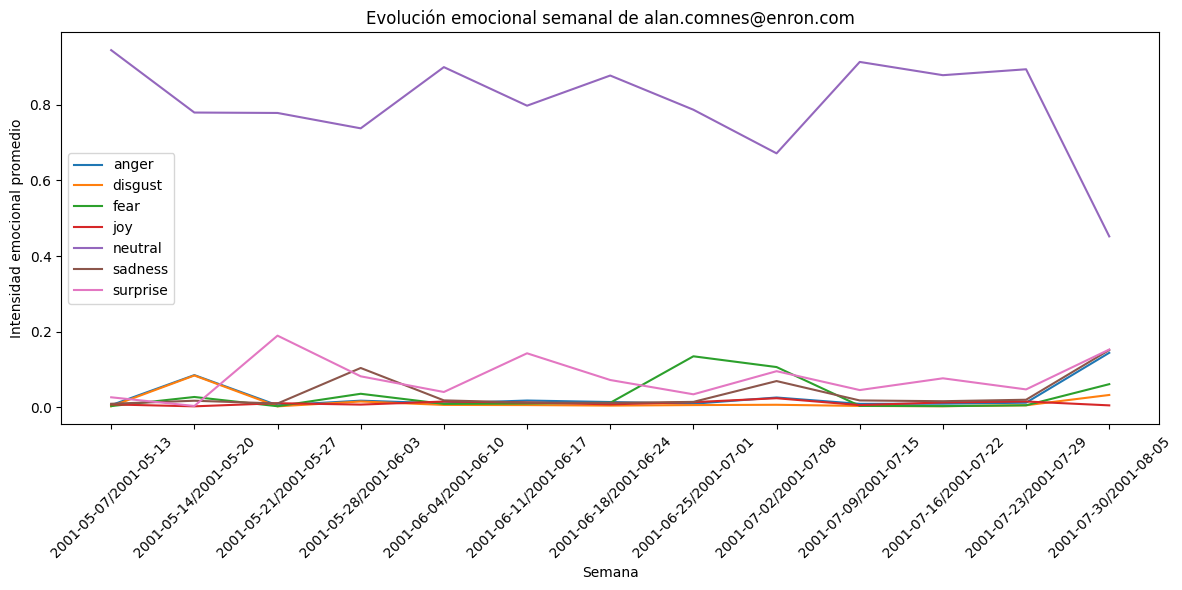

In [ ]:
import matplotlib.pyplot as plt

empleado_email = "alan.comnes@enron.com"  # Cambia por el email deseado
df_user = df_agg[df_agg["from"] == empleado_email].sort_values("week")

plt.figure(figsize=(12, 6))

for emo in emociones:
    if emo in df_user.columns:
        plt.plot(df_user["week"], df_user[emo], label=emo)

plt.xticks(rotation=45)
plt.title(f"Evolución emocional semanal de {empleado_email}")
plt.xlabel("Semana")
plt.ylabel("Intensidad emocional promedio")
plt.legend()
plt.tight_layout()
plt.show()


### 6. Predicción de "Burnout"

Creamos una columna binaria: burnout_risk = 1 si hay alto riesgo, 0 si no.

In [ ]:
df_agg["burnout_risk"] = (
    (df_agg["neg_to_pos_ratio"] > 1.5) &
    (df_agg["email_count"] > df_agg["email_count"].quantile(0.75))
).astype(int)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features numéricos
features = emociones + ["email_count", "neg_to_pos_ratio"]
X = df_agg[features]
y = df_agg["burnout_risk"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
# Modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Evaluación
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00        33

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [ ]:
df_agg["burnout_pred"] = modelo.predict(df_agg[features])

#### Heatmap de riesgo de burnout por semana y usuario

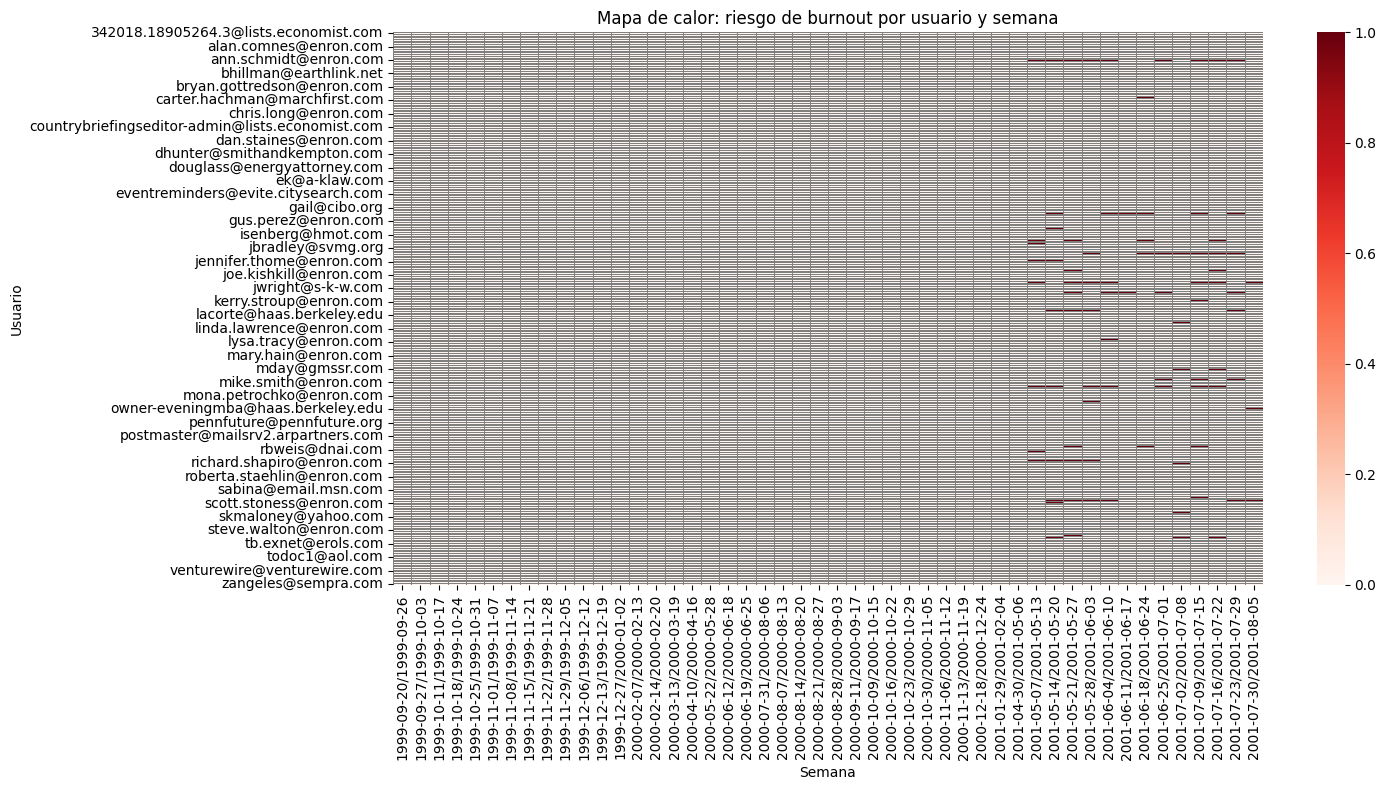

In [ ]:
import seaborn as sns

df_pivot = df_agg.pivot(index="from", columns="week", values="burnout_pred").fillna(0)

plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.title("Mapa de calor: riesgo de burnout por usuario y semana")
plt.xlabel("Semana")
plt.ylabel("Usuario")
plt.tight_layout()
plt.show()


# Nueva sección